<a href="https://colab.research.google.com/github/LeeGyeongyong/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding = 'utf-8', sep = ',', header = 0,
                 index_col = None, nrows = None)

print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode = 'r', encoding = 'utf=8') as f:
    data = json.load(f)
print(data)


## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient = 'records', encoding = 'utf-8',
                  lines = False)
print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log',mode = 'w', encoding = 'utf-8') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get( url, params = params)
    response.raise_for_status(  )

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.02110004425048828, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-08T05:30', 'interval': 900, 'temperature_2m': 26.5}}
서울시 종로구의 현재 온도는 : 26.5°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0  82.8M      0  0:00:01  0:00:01 --:--:-- 82.8M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 447 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

try :
    title_text = tree.xpath('//title/text()')
    #print('웹페이지 제목(Xpath):', title_text[0] if title_text else'제목없음')
    print(title_text)
except Exception as e:
          print(f'Xpath 추출실패:{e}')

## 드라이버 종료
driver.quit()


['\n\t\tAlert \n\t\t\n\t']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = ' http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = 'HH+mbrHQALE2UuDkUygMi+c2xKlF6r/ENEiA06GcgLrbzXljOVMC2oCm4GwzBGo7doxgRPjaShFMY9rm0ZrXHg=='
params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params = params)

## 호출 성공/실패 출력
print(response.json())


{'response': {'body': {'totalCount': 40, 'items': [{'so2Grade': '1', 'coFlag': None, 'khaiValue': '57', 'so2Value': '0.002', 'coValue': '0.3', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '2', 'pm10Value': '6', 'khaiGrade': '2', 'pm25Value': '6', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-13 21:00', 'coGrade': '1', 'no2Value': '0.014', 'stationName': '중구', 'pm10Grade': '1', 'o3Value': '0.037'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '42', 'so2Value': '0.003', 'coValue': '0.4', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '8', 'khaiGrade': '1', 'pm25Value': '3', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-13 21:00', 'coGrade': '1', 'no2Value': '0.013', 'stationName': '한강대로', 'pm10Grade': '1', 'o3Value': '0.025'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '57', 'so2Value': '0.002', 'coValue': '0

In [ ]:
import requests


## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
api_key = 'HH+mbrHQALE2UuDkUygMi+c2xKlF6r/ENEiA06GcgLrbzXljOVMC2oCm4GwzBGo7doxgRPjaShFMY9rm0ZrXHg=='
## 2015년01월 ~ 2024년12월
def get_search_date():
    search_date = []
    for year in range(2015, 2025):
        for month in range(1, 13):
            search_date.append(f'{year}{month:02d}')
    return search_date

responses = []

for search_date in get_search_date():
        params = {
            'serviceKey': api_key,
            'returnType': 'json',
            'numOfRows': '100',
            'pageNo': '1',
            'searchDate': search_date,
            'ver': '1.0'
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
        # JSON에서 실제 데이터 추출
            items = data.get('response', {}).get('body', {}).get('item', [])
            if items:
                responses.extend(items)  # 전체 데이터를 리스트에 저장
                print(f"{search_date} 호출 성공, 수집 건수: {len(items)}")
            else:
                print(f"{search_date} 호출 성공, 데이터 없음")
        else:
            print(f"{search_date} 호출 실패: {response.status_code}")

# 최종 수집된 데이터 개수 확인
print(f"총 수집 건수: {len(responses)}")

#        if response.status_code == 200:
#           data = response.json()
#            print('API 호출성공')
#            print(response.json())
#        else:
#           print(f'API 호출 실패: {responses.status_code}')

201501 호출 실패: 404
201502 호출 실패: 404
201503 호출 실패: 404
201504 호출 실패: 404
201505 호출 실패: 404
201506 호출 실패: 404
201507 호출 실패: 404
201508 호출 실패: 404
201509 호출 실패: 404
201510 호출 실패: 404
201511 호출 실패: 404
201512 호출 실패: 404
201601 호출 실패: 404
201602 호출 실패: 404
201603 호출 실패: 404
201604 호출 실패: 404
201605 호출 실패: 404
201606 호출 실패: 404
201607 호출 실패: 404
201608 호출 실패: 404
201609 호출 실패: 404
201610 호출 실패: 404
201611 호출 실패: 404
201612 호출 실패: 404
201701 호출 실패: 404
201702 호출 실패: 404
201703 호출 실패: 404
201704 호출 실패: 404
201705 호출 실패: 404
201706 호출 실패: 404
201707 호출 실패: 404
201708 호출 실패: 404
201709 호출 실패: 404
201710 호출 실패: 404
201711 호출 실패: 404


KeyboardInterrupt: 

In [ ]:
response.json()

{'response': {'body': {'item': {'heat': 514,
    'waterHot': 155,
    'gas': 3,
    'elect': 711,
    'waterCool': 241}},
  'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}}}

In [ ]:
import pandas as pd
## JSON 형태의 데이터를 pandas DataFrame으로 변환하고
data = response.json()['response']['body']['item']
df = pd.DataFrame([data])

## 데이터의 기본 정보를 출력
print(df.head())

   heat  waterHot  gas  elect  waterCool
0   514       155    3    711        241


In [ ]:
print(df.columns)

Index(['heat', 'waterHot', 'gas', 'elect', 'waterCool'], dtype='object')


In [ ]:
df['date'] = pd.to_datetime(df['searchdate'], format='%Y%m')
df['year'] = df['date'].dt.year
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = df['date'].dt.month.apply(get_season)
print(df[['date', 'year', 'season']].head(12))

KeyError: 'searchdate'

In [ ]:
import requests


## 데이터 수집 url 및 api key 설정
api_key = '42616d756871687437344a5261546e'
url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/2015/01'


params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

response = requests.get(url, params=params)

if response.status_code == 200:
  print("api 호출 성공")
  print(response.json())
else:
  print(f"API 호출 실패: {response.status_code}")

api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.

In [1]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [39]:
import requests
# api key 값 설정
api_key = '42616d756871687437344a5261546e'
# 데이터 수집 테스트
# url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/2015/01'
# 2015년01월 ~ 2024년12월 까지 데이터 수집
print("데이터수집중")
def get_search_date():
    search_date = []
    for year in range(2015, 2025):  # 2015년 ~ 2024년
        for month in range(1, 13):  # 01월 ~ 12월
            ym = f"{year}{month:02d}"
            url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/100/{year}/{month:02d}"
            try:
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()
                    rows = data.get("energyUseDataSummaryInfo", {}).get("row", [])
                    search_date.extend(rows)
                    print(".", end="", flush=True)  # 진행상황 점으로 표시
                else:
                    print("x", end="", flush=True)  # 실패 표시
            except Exception as e:
                print("E", end="", flush=True)  # 예외 발생 시 표시
    print('\n')
    return search_date
responses = get_search_date()
print(f" 수집 완료: 2015년01월~ 2024년12월 총 {len(responses):,}건")

데이터수집중
........................................................................................................................

 수집 완료: 2015년01월~ 2024년12월 총 840건


In [42]:
import pandas as pd
## JSON 형태의 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(responses)
##컬럼 정보 출력
print(df.info())
## 데이터 정보 상위 5줄  출력
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      840 non-null    object
 1   MON       840 non-null    object
 2   MM_TYPE   840 non-null    object
 3   CNT       840 non-null    object
 4   EUS       840 non-null    object
 5   EUS1      840 non-null    object
 6   EUS2      840 non-null    object
 7   ECO2_1    840 non-null    object
 8   ECO2_2    840 non-null    object
 9   GUS       840 non-null    object
 10  GUS1      840 non-null    object
 11  GUS2      840 non-null    object
 12  GCO2_1    840 non-null    object
 13  GCO2_2    840 non-null    object
 14  WUS       840 non-null    object
 15  WUS1      840 non-null    object
 16  WUS2      840 non-null    object
 17  WCO2_1    840 non-null    object
 18  WCO2_2    840 non-null    object
 19  HUS       840 non-null    object
 20  HUS1      840 non-null    object
 21  HUS2      840 no

In [43]:
# 날짜(date) 컬럼 생성: YEAR + MON 합쳐서 datetime으로 변환
df['date'] = pd.to_datetime(df['YEAR'] + df['MON'], format='%Y%m')
# 연도(year) 컬럼 생성
df['year'] = df['date'].dt.year
# [12월,1월,2월 겨울],[3월,4월,5월 봄],...월별 계절특정
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'
# 계절(season) 컬럼 생성
df['season'] = df['date'].dt.month.apply(get_season)
# 결과 확인
print(df[['date', 'year', 'season']])

          date  year season
0   2015-01-01  2015     겨울
1   2015-01-01  2015     겨울
2   2015-01-01  2015     겨울
3   2015-01-01  2015     겨울
4   2015-01-01  2015     겨울
..         ...   ...    ...
835 2024-12-01  2024     겨울
836 2024-12-01  2024     겨울
837 2024-12-01  2024     겨울
838 2024-12-01  2024     겨울
839 2024-12-01  2024     겨울

[840 rows x 3 columns]


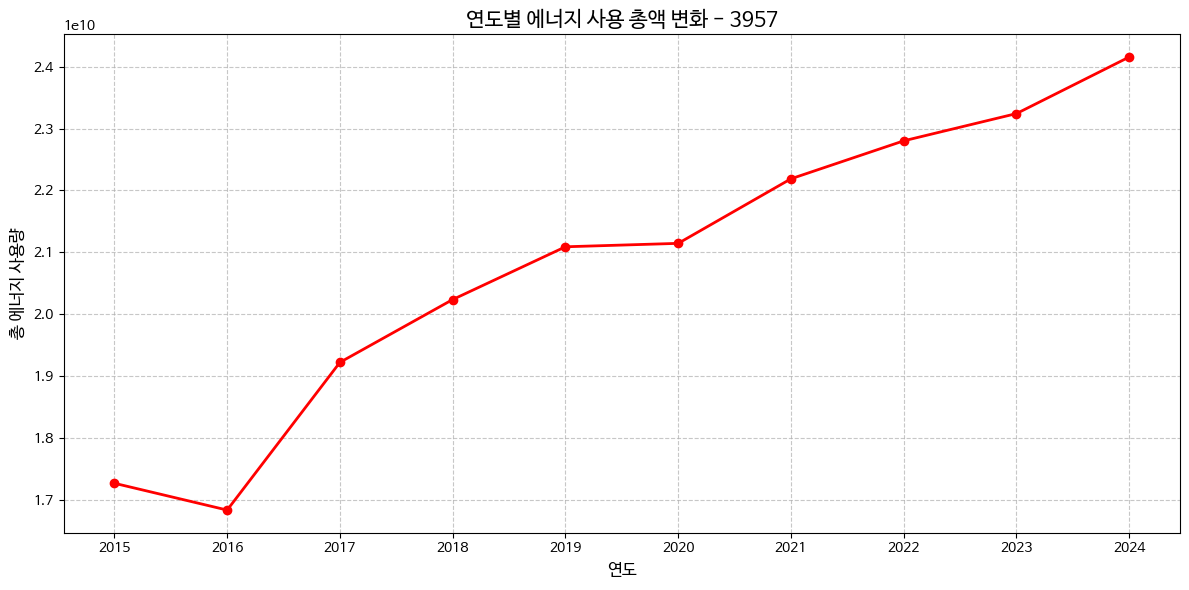

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 숫자형으로 변환 (현재 object 타입이므로)
df[['EUS','GUS','WUS','HUS']] = df[['EUS','GUS','WUS','HUS']].apply(pd.to_numeric, errors='coerce')
# 총 에너지 사용량 컬럼 생성
df['total_energy'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
# 연도별 총 사용량 집계
yearly_energy = df.groupby('year')['total_energy'].sum().reset_index()
# 시각화
plt.figure(figsize=(12,6))
plt.plot(yearly_energy['year'], yearly_energy['total_energy'],
         marker='o', linestyle='-', color='r',linewidth = 2)
plt.title('연도별 에너지 사용 총액 변화 - 3957',fontsize=15)
plt.xlabel('연도',fontsize=12)
plt.ylabel('총 에너지 사용량',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_energy['year'])
plt.tight_layout()
# 그래프 저장
plt.savefig('연도별 에너지 사용 총액 변화 - 3957.png')
plt.show()

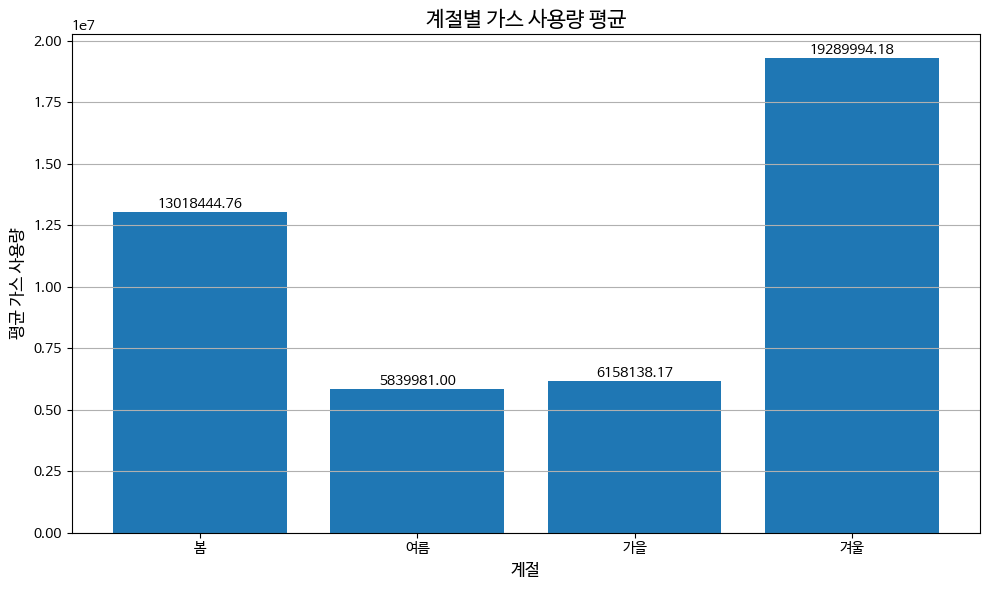

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# GUS object 타입 숫자형 변환
df['GUS'] = pd.to_numeric(df['GUS'])
# 계절별 GUS 평균 계산
season_avg = df.groupby('season')['GUS'].mean().reindex(['봄','여름','가을','겨울']).reset_index()
# 막대 그래프 시각화
plt.figure(figsize=(10,6))
bars = plt.bar(season_avg['season'], season_avg['GUS'])
# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')
plt.title("계절별 가스 사용량 평균", fontsize=15)
plt.xlabel("계절", fontsize=12)
plt.ylabel("평균 가스 사용량", fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
# 그래프 저장
plt.savefig("계절별_가스_사용량_평균.png")
plt.show()